In [48]:
# packages
import os
import gc
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, f1_score, accuracy_score
from tqdm.auto import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [49]:
SEED=42
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(SEED) # Seed 고정

In [50]:
df = pd.read_csv('./raw_data.csv')
df

,EQUIP_ID,MFG_DT,SALE_CD,MOLD_POS,REAL_POWER,CP,AX,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5
0,EQUIP1,2021-03-23,SALES 0,8,0.00,NaN,NaN,CORE1 A 02. 0570,CORE1 A 01. P3+3,CORE1 A 05. M0075,CORE1 A 8A. D-00,-6.4889,6.5811,0.00,0.12,0.12,0.12,0.25,0.25
1,EQUIP2,2021-03-23,SALES 1,1,-6.50,NaN,NaN,CORE1 B 02. 0550,CORE1 B 01. P2+1,CORE1 B 02. M1050,CORE1 B 02. C-10,-6.3564,7.4551,-6.50,-6.25,-6.25,-6.37,-6.50,-6.50
2,EQUIP1,2021-03-25,SALES 2,2,0.00,NaN,NaN,CORE2 C 03. 0660,CORE2 C 03. P1+0,CORE2 C 04. M0000,CORE2 C 04. A-00,-7.3246,7.3802,0.00,0.12,0.12,0.25,0.25,0.25
3,EQUIP2,2021-03-25,SALES 3,6,-7.50,NaN,NaN,CORE1 B 02. 0550,CORE1 B 01. P2+1,CORE1 B 02. M1250,CORE1 B 02. C-12,-6.3600,7.6877,-7.50,-7.50,-7.50,-7.62,-7.62,-7.62
4,EQUIP3,2021-04-09,SALES 4,1,-0.75,NaN,NaN,CORE3 C 01. 0660,CORE3 C 01. OK+2,CORE3 C 03. M0125,CORE3 C 03. B-01,-7.3411,7.5236,-0.75,-0.87,-0.87,-0.87,-0.87,-0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175097,EQUIP13,2020-10-13,SALES 114,4,-5.25,NaN,NaN,CORE5 F 01. 0570,CORE5 F 01. OK+0,CORE5 F 02. M0850,CORE5 F 02. C-08,-6.3304,7.1881,-5.25,-5.25,-5.25,-5.25,-5.25,-5.25
175098,EQUIP13,2020-10-14,SALES 114,5,-5.25,NaN,NaN,CORE5 F 01. 0570,CORE5 F 01. OK+2,CORE5 F 02. M0875,CORE5 F 02. D-08,-6.4933,6.8071,-5.25,-5.12,-5.12,-5.25,-5.25,-5.25
175099,EQUIP13,2020-10-16,SALES 114,6,-5.50,NaN,NaN,CORE5 F 01. 0570,CORE5 F 01. OK+1,CORE5 F 02. M0950,CORE5 F 02. C-09,-6.3582,0.0000,-5.50,-5.37,-5.37,-5.50,-5.50,-5.50
175100,EQUIP35,2020-10-14,SALES 114,7,-8.00,NaN,NaN,CORE5 F 01. 0570,CORE5 F 01. P1+0,CORE5 F 02. M1350,CORE5 F 02. C-13,-6.3056,7.7866,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df['REAL_POWER'].describe()

count    175089.000000
mean         -3.351588
std           2.401494
min         -12.000000
25%          -5.000000
50%          -3.250000
75%          -1.500000
max           6.000000
Name: REAL_POWER, dtype: float64

In [52]:
print(df['MOLD_IN_TOP'].value_counts())
print(df['MOLD_IN_BOT'].value_counts())
print(df['MOLD_OUT_TOP'].value_counts())
print(df['MOLD_OUT_BOT'].value_counts())

MOLD_IN_TOP
CORE1 A 02. 0570    68090
CORE1 B 02. 0550    52320
CORE2 C 03. 0660    25794
CORE3 C 01. 0660    14370
CORE4 D 01. 0565     6220
CORE5 E 01. 0590     4442
CORE5 F 01. 0570     2260
CORE7 G 01. 0600      544
CORE2 J 03. 0650      480
CORE1 H 03. 0580      249
CORE2 K 01. 0670      197
CORE8 J 01. 0650       95
CORE7 I 01. 0610       32
CORE8 L 1-1 0630        9
Name: count, dtype: int64
MOLD_IN_BOT
CORE1 B 01. P2+1    16288
CORE1 A 01. P3+3    11767
CORE1 A 01. P2+3    10129
CORE1 A 01. P3+2     9956
CORE1 A 01. P2+2     9726
                    ...  
CORE2 J 01. M3+2        1
CORE2 J 01. OK+3        1
CORE4 D 01. OK+3        1
CORE8 J 01. M1+2        1
CORE5 F 01. OK+4        1
Name: count, Length: 221, dtype: int64
MOLD_OUT_TOP
CORE1 A 05. M0075    4185
CORE2 C 04. M0025    3604
CORE1 A 05. M0250    3371
CORE1 A 05. M0050    2847
CORE1 A 05. M0300    2792
                     ... 
CORE2 C 04. M1500       1
CORE1 A 05. P0100       1
CORE1 A 08. P0700       1
CORE8 J 02. M0

In [53]:
df.isnull().sum()

EQUIP_ID             0
MFG_DT               0
SALE_CD              0
MOLD_POS             0
REAL_POWER          13
CP              175102
AX              175102
MOLD_IN_TOP          0
MOLD_IN_BOT          0
MOLD_OUT_TOP         0
MOLD_OUT_BOT         0
IN_RADIUS            0
OUT_RADIUS           0
POWER              580
POWER1             530
POWER2             532
POWER3             537
POWER4             540
POWER5             551
dtype: int64

In [55]:
df_dropna = df.drop(['CP','AX','SALE_CD'],axis=1)

new_df = df_dropna.loc[df['REAL_POWER'] == df['POWER']].dropna(axis=0)
anomaly_df = df_dropna.loc[df['REAL_POWER'] != df['POWER']].dropna(axis=0)

new_df = new_df.loc[new_df['REAL_POWER'] < 0]
anomaly_df = anomaly_df.loc[anomaly_df['REAL_POWER'] < 0]

new_df = new_df.loc[new_df['POWER'] < 0]
anomaly_df = anomaly_df.loc[anomaly_df['POWER'] < 0]

new_df['MFG_DT'] = pd.to_datetime(new_df['MFG_DT'])
anomaly_df['MFG_DT'] = pd.to_datetime(anomaly_df['MFG_DT'])

new_df = new_df[new_df['MFG_DT'] >= np.datetime64('2020-01-01')]
anomlay_df = anomaly_df[anomaly_df['MFG_DT'] >= np.datetime64('2020-01-01')]

new_df = new_df.drop('MFG_DT', axis = 1)
anomaly_df = anomaly_df.drop('MFG_DT', axis=1)


new_df = new_df.loc[new_df['POWER'] > -20].dropna(axis=0)
anomaly_df = anomaly_df.loc[anomaly_df['POWER'] > -20].dropna(axis=0)



new_df['IN_RADIUS'] = abs(new_df['IN_RADIUS'])
new_df['OUT_RADIUS'] = abs(new_df['OUT_RADIUS'])
anomaly_df['IN_RADIUS'] = abs(anomaly_df['IN_RADIUS'])
anomaly_df['OUT_RADIUS'] = abs(anomaly_df['OUT_RADIUS'])
print(new_df.shape)
print(anomaly_df.shape)

(28607, 15)
(557, 15)


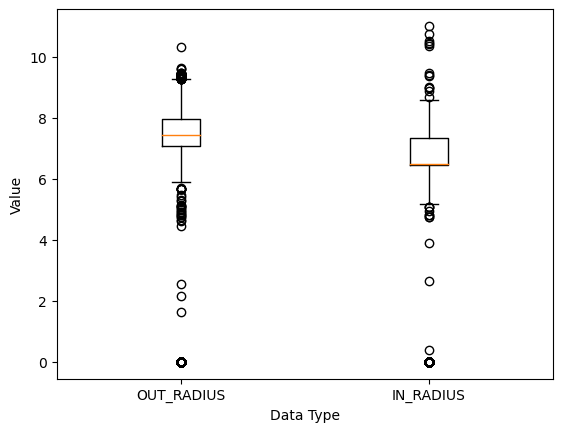

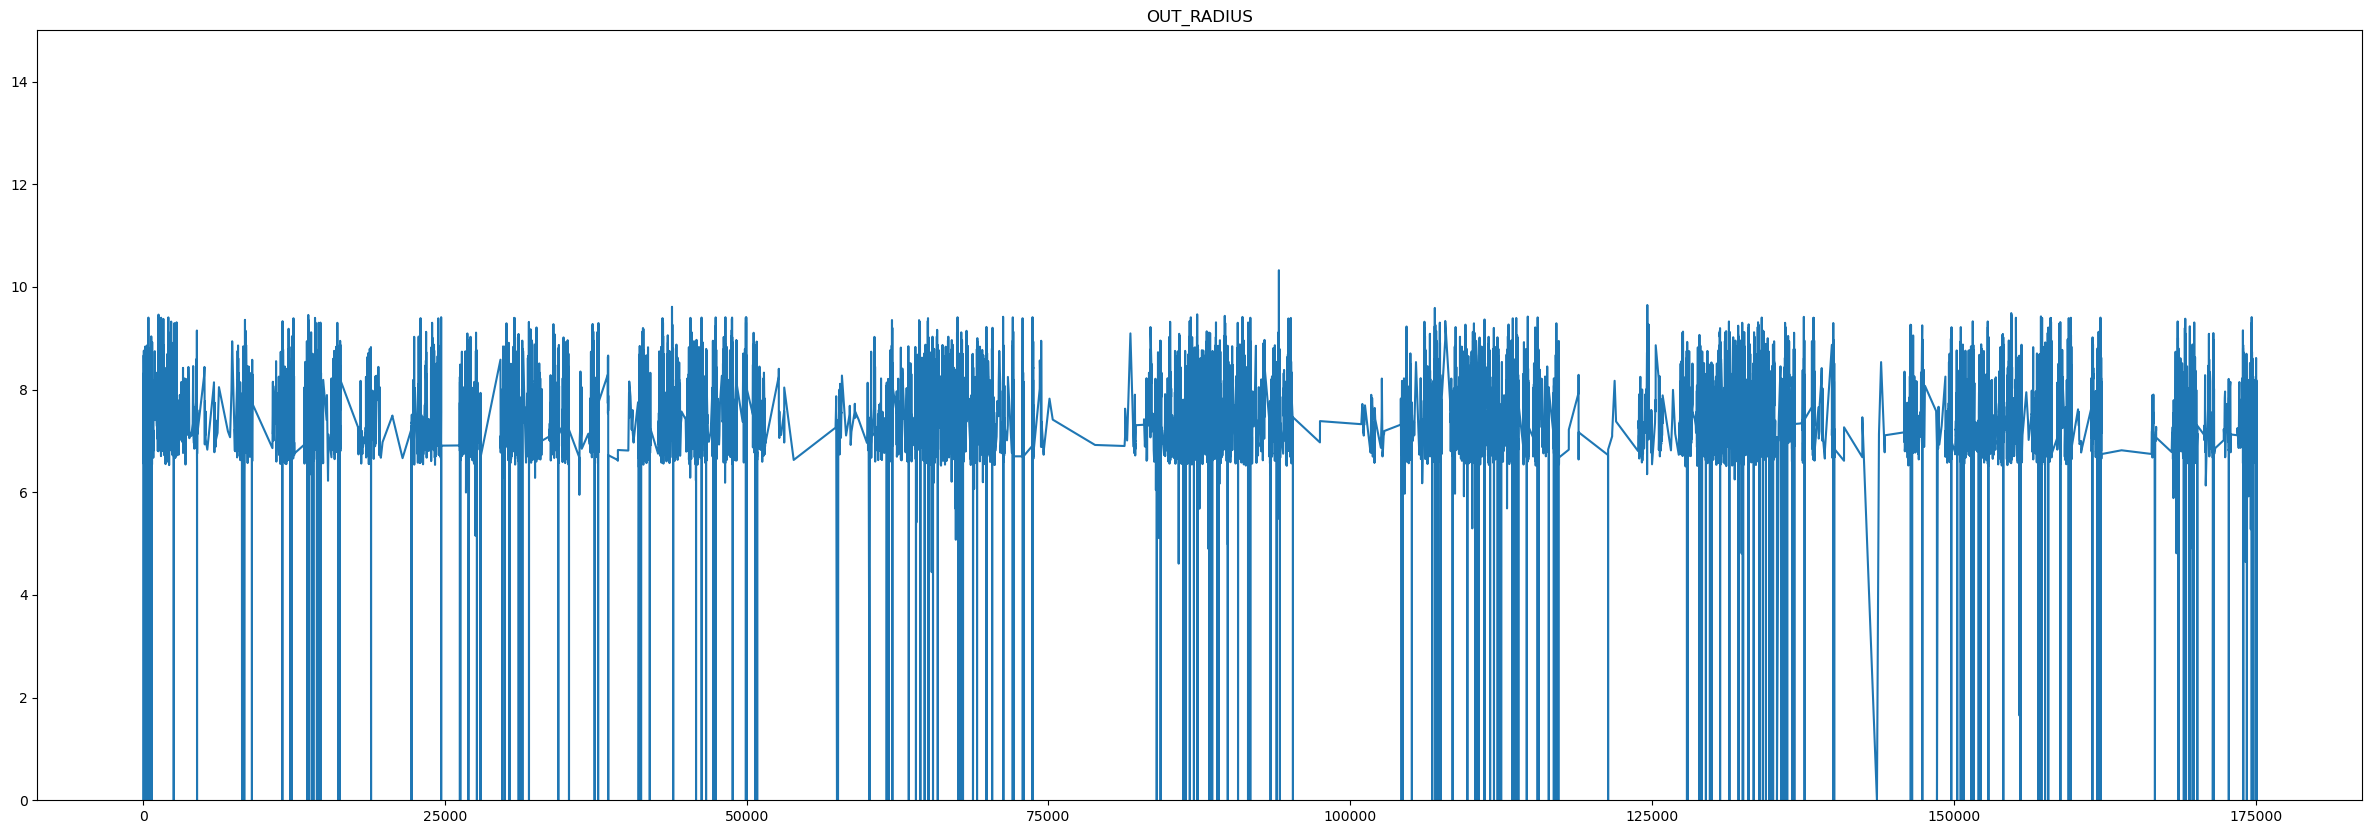

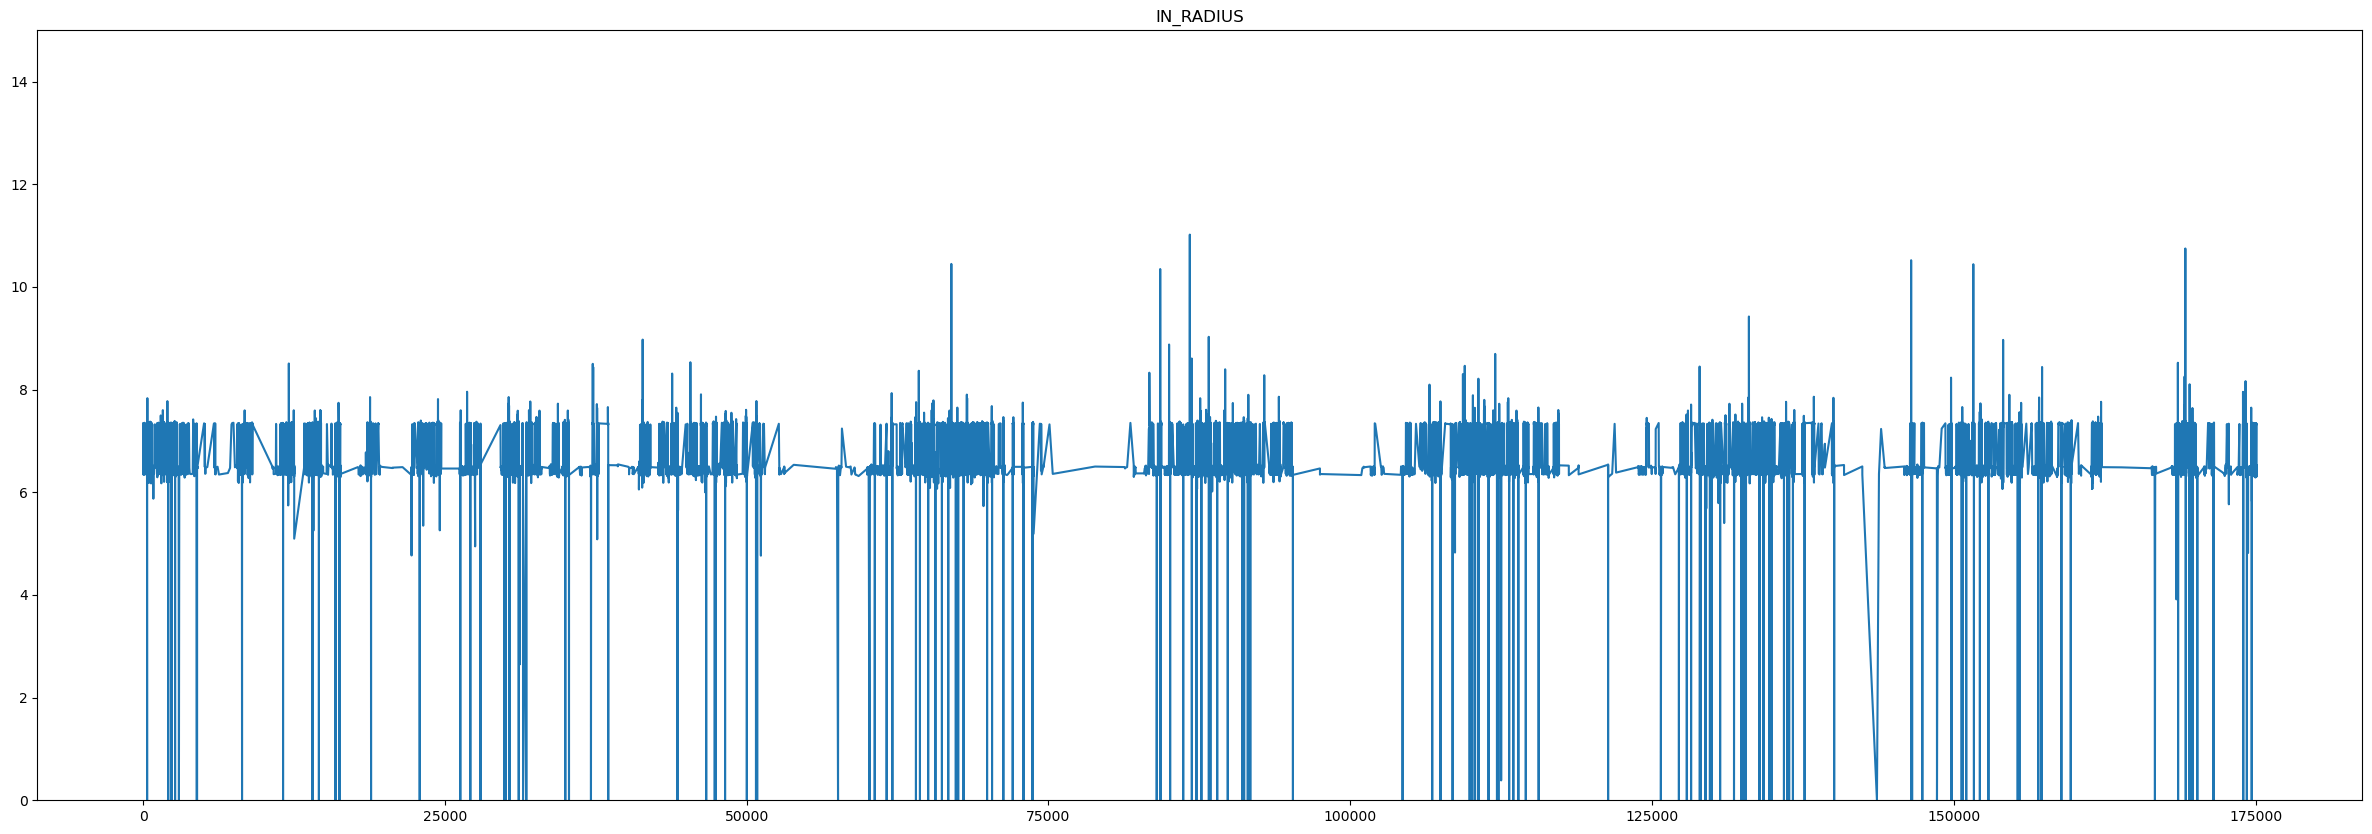

In [31]:
fig, ax = plt.subplots()

ax.boxplot([new_df['OUT_RADIUS'], new_df['IN_RADIUS']])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')
plt.xticks([1, 2], ['OUT_RADIUS','IN_RADIUS'])
plt.show()

plt.figure(figsize=(30,10))
plt.plot(new_df['OUT_RADIUS'])
plt.title('OUT_RADIUS')
plt.ylim([0,15])
plt.show()

plt.figure(figsize=(30,10))
plt.plot(new_df['IN_RADIUS'])
plt.title('IN_RADIUS')
plt.ylim([0,15])
plt.show()

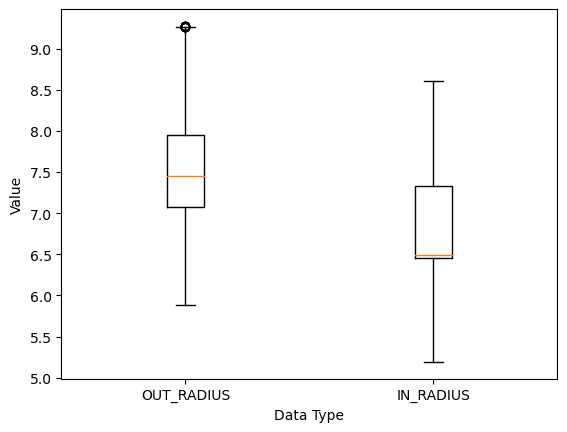

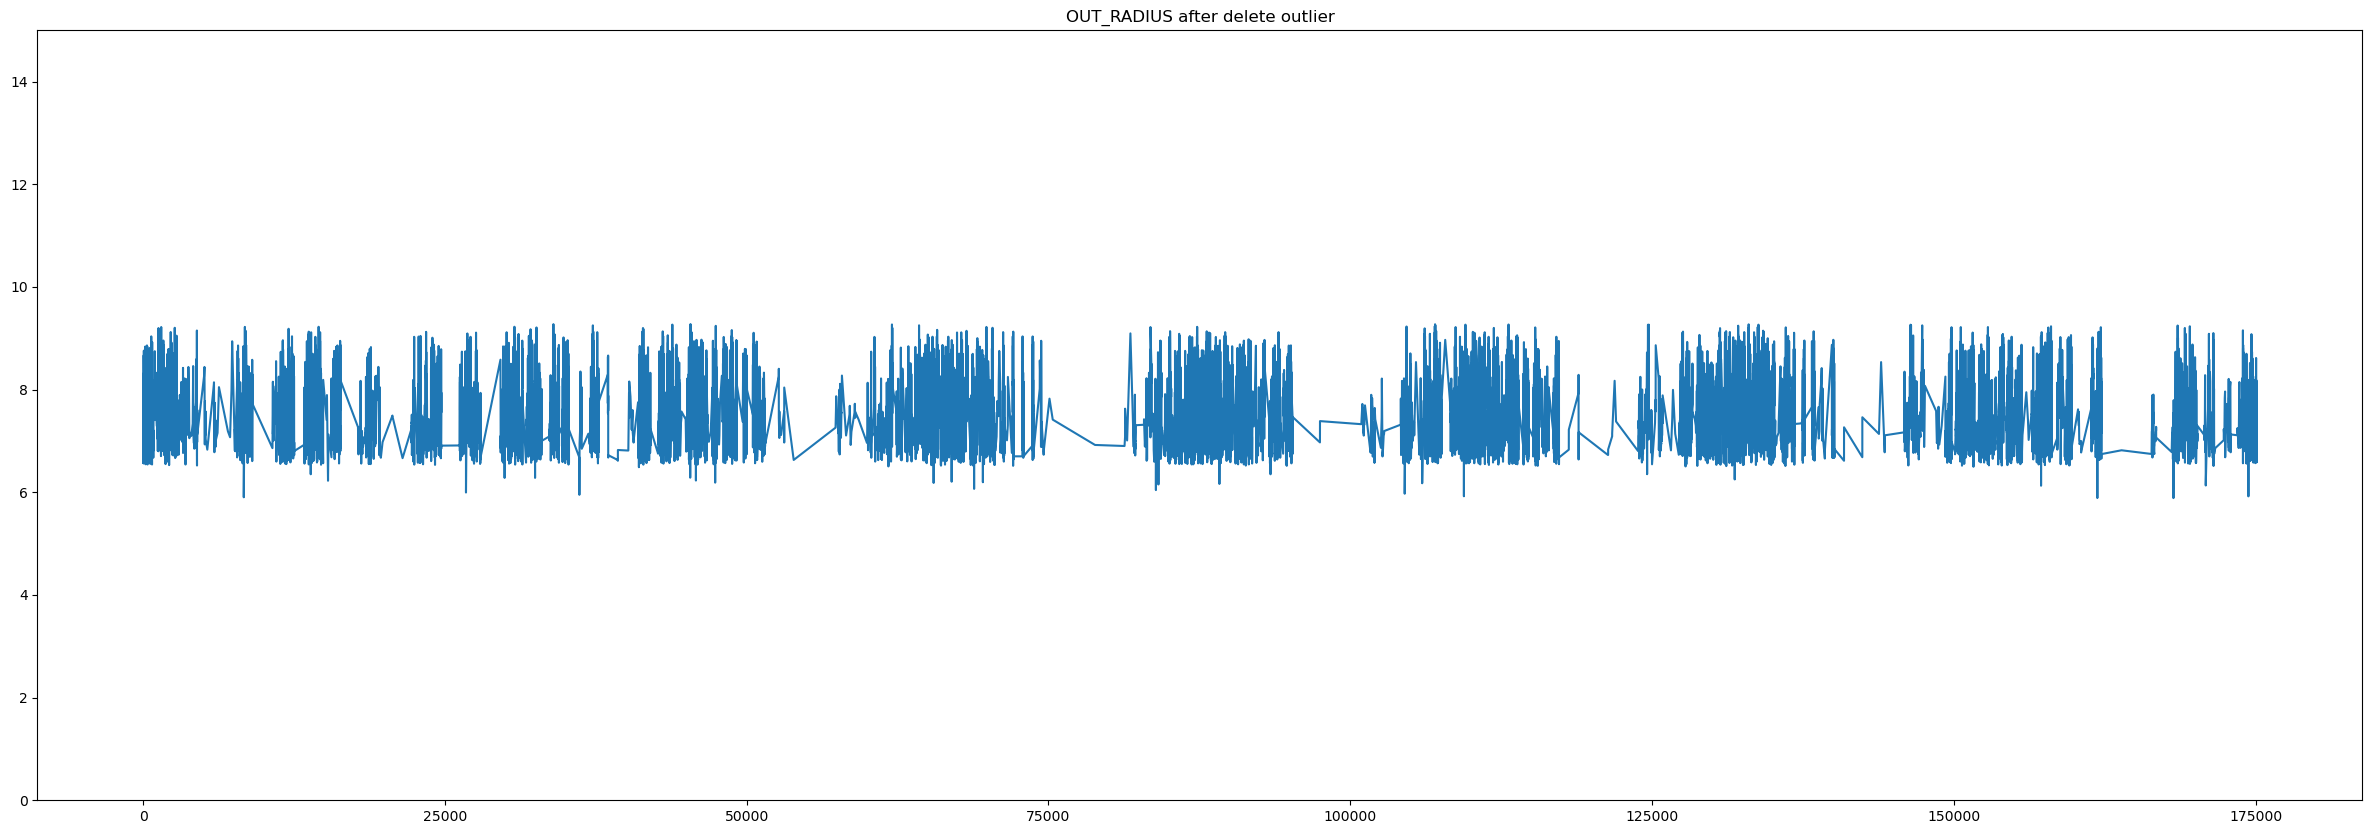

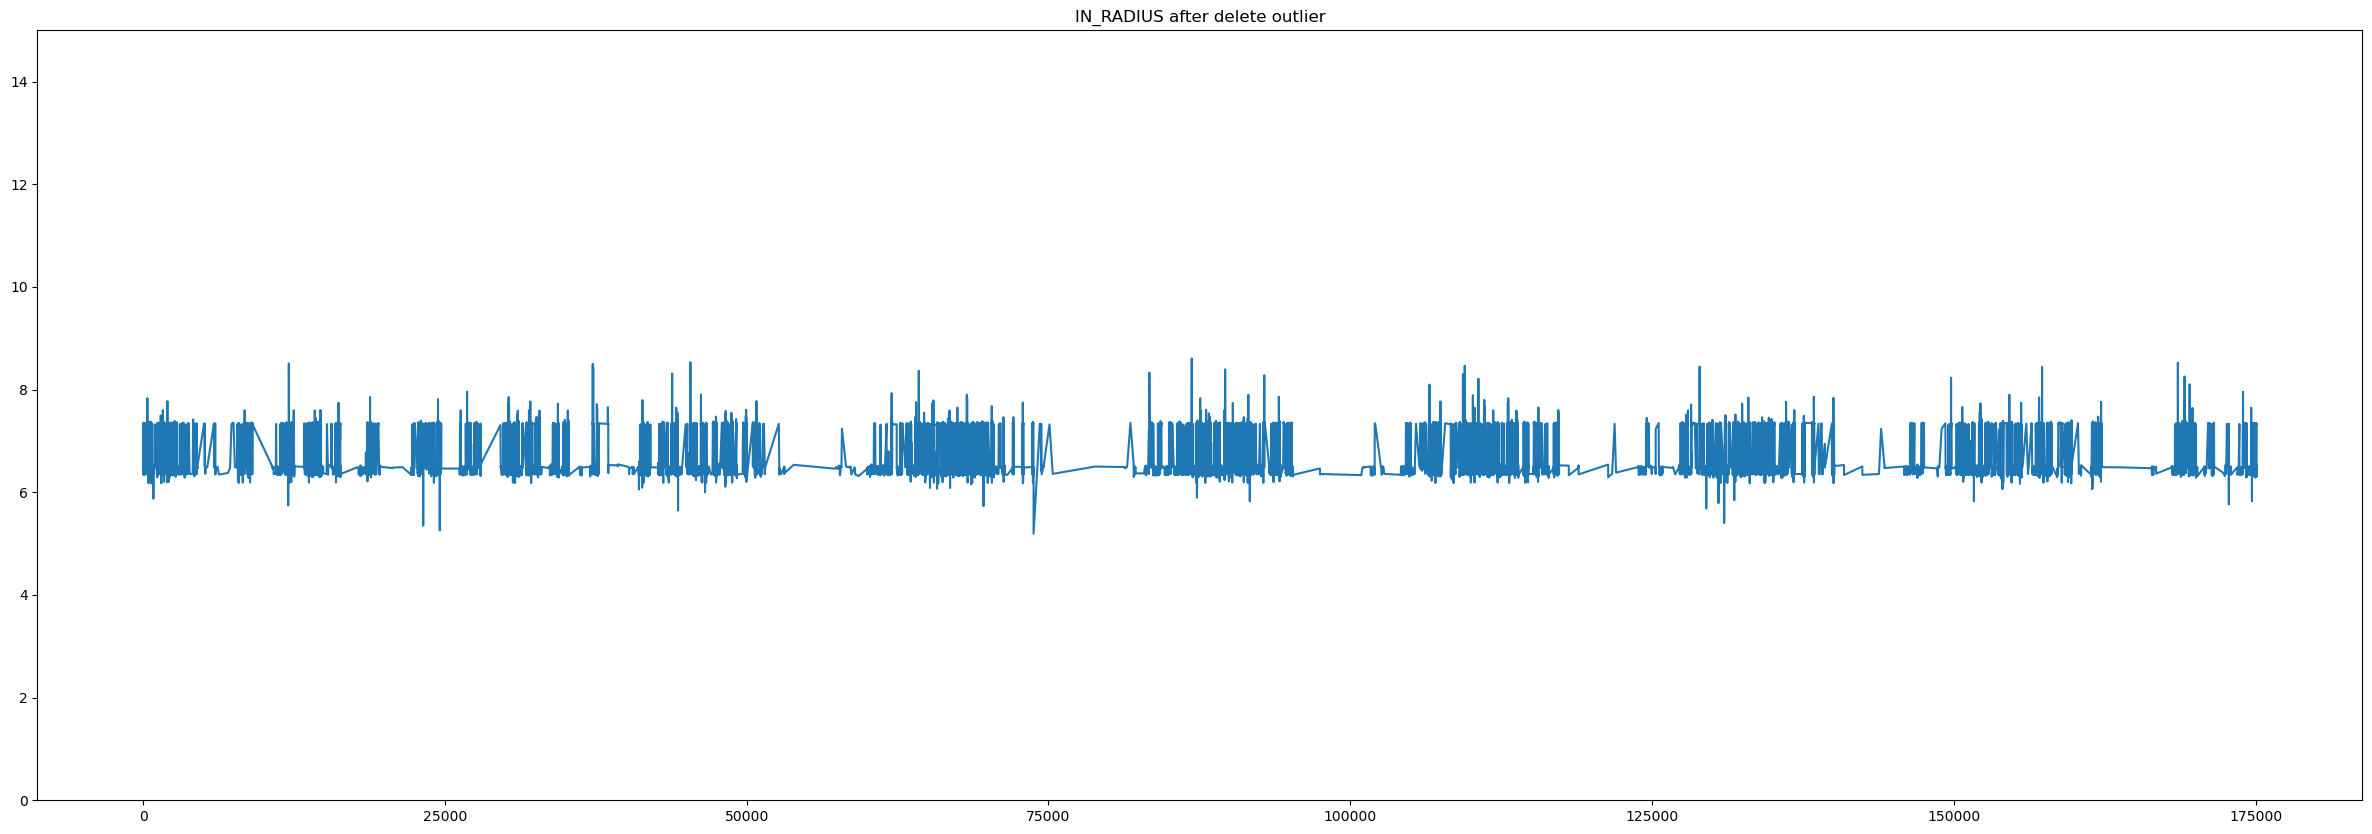

In [32]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx_in_rad = get_outlier(df=new_df, column='IN_RADIUS', weight=1.5)
new_df = new_df.drop(outlier_idx_in_rad,axis=0)
outlier_idx_out_rad = get_outlier(df=new_df, column='OUT_RADIUS', weight=1.5)
new_df = new_df.drop(outlier_idx_out_rad,axis=0)

outlier_idx_in_rad = get_outlier(df=anomaly_df, column='IN_RADIUS', weight=1.5)
anomaly_df = anomaly_df.drop(outlier_idx_in_rad,axis=0)
outlier_idx_out_rad = get_outlier(df=anomaly_df, column='OUT_RADIUS', weight=1.5)
anomaly_df = anomaly_df.drop(outlier_idx_out_rad,axis=0)

fig, ax = plt.subplots()

ax.boxplot([new_df['OUT_RADIUS'], new_df['IN_RADIUS']])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')
plt.xticks([1, 2], ['OUT_RADIUS','IN_RADIUS'])
plt.show()

plt.figure(figsize=(30,10))
plt.plot(new_df['OUT_RADIUS'])
plt.title('OUT_RADIUS after delete outlier')
plt.ylim([0,15])
plt.show()

plt.figure(figsize=(30,10))
plt.plot(new_df['IN_RADIUS'])
plt.title('IN_RADIUS after delete outlier')
plt.ylim([0,15])
plt.show()

In [33]:
new_df['target'] = 0
anomaly_df['target'] = 1

In [34]:
new_df

,EQUIP_ID,MOLD_POS,REAL_POWER,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5,target
1,EQUIP2,1,-6.50,CORE1 B 02. 0550,CORE1 B 01. P2+1,CORE1 B 02. M1050,CORE1 B 02. C-10,6.3564,7.4551,-6.50,-6.25,-6.25,-6.37,-6.50,-6.50,0
3,EQUIP2,6,-7.50,CORE1 B 02. 0550,CORE1 B 01. P2+1,CORE1 B 02. M1250,CORE1 B 02. C-12,6.3600,7.6877,-7.50,-7.50,-7.50,-7.62,-7.62,-7.62,0
4,EQUIP3,1,-0.75,CORE3 C 01. 0660,CORE3 C 01. OK+2,CORE3 C 03. M0125,CORE3 C 03. B-01,7.3411,7.5236,-0.75,-0.87,-0.87,-0.87,-0.87,-0.87,0
5,EQUIP4,8,-4.00,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0650,CORE1 A 08. C-06,6.4829,7.1508,-4.00,-4.00,-3.87,-3.87,-4.12,-4.12,0
6,EQUIP5,6,-8.50,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M1550,CORE1 A 08. C-15,6.4800,8.2939,-8.50,-8.25,-8.25,-8.37,-8.37,-8.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175095,EQUIP37,1,-4.00,CORE5 F 01. 0570,CORE5 F 01. OK+1,CORE5 F 02. M0675,CORE5 F 02. D-06,6.3326,6.9997,-4.00,-4.12,-4.12,-4.00,-4.00,-4.00,0
175096,EQUIP37,8,-4.75,CORE5 F 01. 0570,CORE5 F 01. OK+2,CORE5 F 02. M0775,CORE5 F 02. D-07,6.3279,7.0979,-4.75,-4.75,-4.75,-4.75,-4.75,-4.75,0
175097,EQUIP13,4,-5.25,CORE5 F 01. 0570,CORE5 F 01. OK+0,CORE5 F 02. M0850,CORE5 F 02. C-08,6.3304,7.1881,-5.25,-5.25,-5.25,-5.25,-5.25,-5.25,0
175098,EQUIP13,5,-5.25,CORE5 F 01. 0570,CORE5 F 01. OK+2,CORE5 F 02. M0875,CORE5 F 02. D-08,6.4933,6.8071,-5.25,-5.12,-5.12,-5.25,-5.25,-5.25,0


In [35]:
anomaly_df

,EQUIP_ID,MOLD_POS,REAL_POWER,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5,target
121,EQUIP15,4,-3.25,CORE1 A 02. 0570,CORE1 A 01. P2+2,CORE1 A 05. M0625,CORE1 A 08. B-06,6.4741,7.1521,-3.50,-3.37,-3.37,-3.50,-3.50,-3.50,1
2297,EQUIP27,2,-8.00,CORE2 C 03. 0660,CORE2 C 03. P1-2,CORE2 C 04. M0475,CORE2 C 04. D-04,7.3455,7.9546,-3.50,-3.50,-3.50,-3.37,-3.37,-3.37,1
2893,EQUIP13,7,-5.00,CORE1 B 02. 0550,CORE1 B 01. P2+0,CORE1 B 02. M0850,CORE1 B 02. C-08,7.2074,6.3643,-5.25,-5.25,-5.25,-5.25,-5.00,-5.00,1
3175,EQUIP26,6,-6.00,CORE2 C 03. 0660,CORE2 C 03. OK+2,CORE2 C 04. M0925,CORE2 C 04. B-09,8.5852,7.3512,-6.50,-6.50,-6.65,-6.75,-6.75,-6.75,1
4051,EQUIP2,3,-3.75,CORE3 C 01. 0660,CORE3 C 01. P1-1,CORE3 C 03. M0525,CORE3 C 03. B-05,8.0007,7.3452,-3.50,-3.50,-3.62,-3.62,-3.62,-3.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174123,EQUIP33,3,-5.25,CORE5 F 01. 0570,CORE5 F 01. OK+0,CORE5 F 02. M0825,CORE5 F 02. B-08,7.1685,6.2684,-5.50,-5.50,-5.62,-5.62,-5.62,-5.62,1
174238,EQUIP16,5,-2.50,CORE2 C 03. 0660,CORE2 C 03. P1+0,CORE2 C 04. M0325,CORE2 C 04. B-03,7.3764,7.7534,-2.25,-2.25,-2.25,-2.25,-2.25,-2.37,1
174257,EQUIP12,6,-1.75,CORE5 E 01. 0590,CORE5 E 01. M2+0,CORE5 E 02. M0300,CORE5 E 02. A-03,6.5082,6.8625,-2.25,-2.25,-2.25,-2.12,-2.12,-2.12,1
174862,EQUIP7,8,-4.00,CORE5 E 01. 0590,CORE5 E 01. M1+0,CORE5 E 02. M0650,CORE5 E 02. C-06,6.5094,7.2148,-4.25,-4.25,-4.25,-4.25,-4.37,-4.37,1


In [36]:
data_df = pd.concat([new_df,anomaly_df])
data_df

,EQUIP_ID,MOLD_POS,REAL_POWER,MOLD_IN_TOP,MOLD_IN_BOT,MOLD_OUT_TOP,MOLD_OUT_BOT,IN_RADIUS,OUT_RADIUS,POWER,POWER1,POWER2,POWER3,POWER4,POWER5,target
1,EQUIP2,1,-6.50,CORE1 B 02. 0550,CORE1 B 01. P2+1,CORE1 B 02. M1050,CORE1 B 02. C-10,6.3564,7.4551,-6.50,-6.25,-6.25,-6.37,-6.50,-6.50,0
3,EQUIP2,6,-7.50,CORE1 B 02. 0550,CORE1 B 01. P2+1,CORE1 B 02. M1250,CORE1 B 02. C-12,6.3600,7.6877,-7.50,-7.50,-7.50,-7.62,-7.62,-7.62,0
4,EQUIP3,1,-0.75,CORE3 C 01. 0660,CORE3 C 01. OK+2,CORE3 C 03. M0125,CORE3 C 03. B-01,7.3411,7.5236,-0.75,-0.87,-0.87,-0.87,-0.87,-0.87,0
5,EQUIP4,8,-4.00,CORE1 A 02. 0570,CORE1 A 01. P1+2,CORE1 A 05. M0650,CORE1 A 08. C-06,6.4829,7.1508,-4.00,-4.00,-3.87,-3.87,-4.12,-4.12,0
6,EQUIP5,6,-8.50,CORE1 A 02. 0570,CORE1 A 01. P3+2,CORE1 A 05. M1550,CORE1 A 08. C-15,6.4800,8.2939,-8.50,-8.25,-8.25,-8.37,-8.37,-8.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174123,EQUIP33,3,-5.25,CORE5 F 01. 0570,CORE5 F 01. OK+0,CORE5 F 02. M0825,CORE5 F 02. B-08,7.1685,6.2684,-5.50,-5.50,-5.62,-5.62,-5.62,-5.62,1
174238,EQUIP16,5,-2.50,CORE2 C 03. 0660,CORE2 C 03. P1+0,CORE2 C 04. M0325,CORE2 C 04. B-03,7.3764,7.7534,-2.25,-2.25,-2.25,-2.25,-2.25,-2.37,1
174257,EQUIP12,6,-1.75,CORE5 E 01. 0590,CORE5 E 01. M2+0,CORE5 E 02. M0300,CORE5 E 02. A-03,6.5082,6.8625,-2.25,-2.25,-2.25,-2.12,-2.12,-2.12,1
174862,EQUIP7,8,-4.00,CORE5 E 01. 0590,CORE5 E 01. M1+0,CORE5 E 02. M0650,CORE5 E 02. C-06,6.5094,7.2148,-4.25,-4.25,-4.25,-4.25,-4.37,-4.37,1


In [37]:
data_df['POWER_MEAN'] = (data_df['POWER1'] + data_df['POWER2'] + data_df['POWER3'] + data_df['POWER4'] + data_df['POWER5']) / 5
df_final = data_df.drop(['EQUIP_ID','MOLD_POS','POWER_MEAN','REAL_POWER','POWER1','POWER2','POWER3','POWER4','POWER5','MOLD_IN_TOP','MOLD_IN_BOT','MOLD_OUT_TOP','MOLD_OUT_BOT'],axis=1)
df_final

,IN_RADIUS,OUT_RADIUS,POWER,target
1,6.3564,7.4551,-6.50,0
3,6.3600,7.6877,-7.50,0
4,7.3411,7.5236,-0.75,0
5,6.4829,7.1508,-4.00,0
6,6.4800,8.2939,-8.50,0
...,...,...,...,...
174123,7.1685,6.2684,-5.50,1
174238,7.3764,7.7534,-2.25,1
174257,6.5082,6.8625,-2.25,1
174862,6.5094,7.2148,-4.25,1


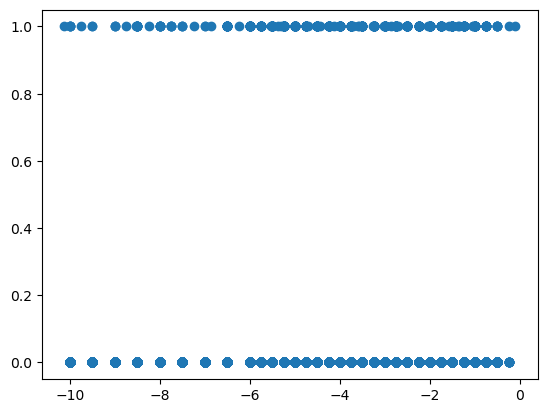

In [38]:
plt.scatter(df_final['POWER'], df_final['target'])

In [39]:
df_final['POWER'].describe()

count    28593.000000
mean        -4.117065
std          2.140269
min        -10.120000
25%         -5.500000
50%         -4.000000
75%         -2.500000
max         -0.100000
Name: POWER, dtype: float64

In [40]:
df_encoded = df_final

In [41]:
#df_encoded = pd.get_dummies(df_final,columns=['MOLD_POS','EQUIP_ID','MOLD_IN_TOP','MOLD_IN_BOT',"MOLD_OUT_TOP",'MOLD_OUT_BOT'])
#df_encoded = pd.get_dummies(df_final,columns=['EQUIP_ID','MOLD_POS','MOLD_IN_TOP'])
#df_encoded.reset_index(drop=True, inplace=True)
df_encoded

,IN_RADIUS,OUT_RADIUS,POWER,target
1,6.3564,7.4551,-6.50,0
3,6.3600,7.6877,-7.50,0
4,7.3411,7.5236,-0.75,0
5,6.4829,7.1508,-4.00,0
6,6.4800,8.2939,-8.50,0
...,...,...,...,...
174123,7.1685,6.2684,-5.50,1
174238,7.3764,7.7534,-2.25,1
174257,6.5082,6.8625,-2.25,1
174862,6.5094,7.2148,-4.25,1


In [42]:
train_x, val_x, train_y, val_y = train_test_split(df_encoded.drop('target',axis=1), df_encoded['target'], test_size = 0.2, stratify=df_encoded['target']
                                  ,random_state=SEED)
train_x.reset_index(drop=True, inplace=True)
val_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
val_y.reset_index(drop=True, inplace=True)


val_x, test_x, val_y, test_y = train_test_split(val_x, val_y, test_size = 0.5, stratify =val_y, random_state=SEED)

val_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
val_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)

print(train_x.shape)
print(val_x.shape)
print(test_x.shape)
print(train_y.shape)
print(train_y.value_counts())
print(val_y.shape)
print(val_y.value_counts())
print(test_y.shape)
print(test_y.value_counts())

(22874, 3)
(2859, 3)
(2860, 3)
(22874,)
target
0    22456
1      418
Name: count, dtype: int64
(2859,)
target
0    2807
1      52
Name: count, dtype: int64
(2860,)
target
0    2807
1      53
Name: count, dtype: int64


In [43]:
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(22874, 3)
(2859, 3)
(2860, 3)


In [44]:
best_f1 = 0
best_c = 0
C_list = [1e-3, 1e-2, 1e-1, 1, 5, 10, 100, 1000, 10000]
for c in C_list:
    lr = LogisticRegression(C=c, max_iter =1000000, random_state=SEED)
    lr.fit(train_x, train_y)
    pred = lr.predict(val_x)
    
    f1 = f1_score(val_y, pred)
    
    if best_f1 < f1:
        best_c = c
        best_f1 = f1
        print("Best parameters searched!!")
        print(f"C : {c}")
        print(f"F1 : {f1}\n")

best_lr = LogisticRegression(C=best_c, max_iter =1000000, random_state=SEED)
best_lr.fit(train_x, train_y)
pred = lr.predict(val_x)
tn, fp, fn, tp = confusion_matrix(val_y, pred).ravel()
specificity = tn/(tn+fp)

print()
print(confusion_matrix(val_y, pred))
print(f"F1 : {f1_score(val_y, pred):.5f}")
print(f"precision : {precision_score(val_y,pred):.5f}")
print(f"recall : {recall_score(val_y,pred):.5f}")
print(f"accuracy : {accuracy_score(val_y,pred):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")
print(f"Best C : {best_c}")
print("\n")


pred_test = best_lr.predict(test_x)

tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
specificity = tn/(tn+fp)
print(confusion_matrix(test_y, pred_test))
print(f"F1 : {f1_score(test_y, pred_test):.5f}")
print(f"precision : {precision_score(test_y,pred_test):.5f}")
print(f"recall : {recall_score(test_y,pred_test):.5f}")
print(f"accuracy : {accuracy_score(test_y,pred_test):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")

Best parameters searched!!
C : 1
F1 : 0.36923076923076925

Best parameters searched!!
C : 5
F1 : 0.5599999999999999

Best parameters searched!!
C : 1000
F1 : 0.5789473684210527


[[2805    2]
 [  30   22]]
F1 : 0.57895
precision : 0.91667
recall : 0.42308
accuracy : 0.98881
Specificity : 0.99929
False Positive Rate : 0.00071
Best C : 1000


[[2804    3]
 [  35   18]]
F1 : 0.48649
precision : 0.85714
recall : 0.33962
accuracy : 0.98671
Specificity : 0.99893
False Positive Rate : 0.00107


In [45]:
best_f1 = 0
best_max_depth = 0
max_depth_list = [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for max_depth in max_depth_list:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=SEED)
    dt.fit(train_x, train_y)
    pred = dt.predict(val_x)
    
    f1 = f1_score(val_y, pred)
    
    if best_f1 < f1:
        best_max_depth = max_depth
        best_f1 = f1
        print("Best parameters searched!!")
        print(f"Max Depth : {max_depth}")
        print(f"F1 : {f1}\n")

best_dt =  DecisionTreeClassifier(max_depth=best_max_depth, random_state=SEED)
best_dt.fit(train_x, train_y)
pred = best_dt.predict(val_x)
tn, fp, fn, tp = confusion_matrix(val_y, pred).ravel()
specificity = tn/(tn+fp)

print()
print(confusion_matrix(val_y, pred))
print(f"F1 : {f1_score(val_y, pred):.5f}")
print(f"precision : {precision_score(val_y,pred):.5f}")
print(f"recall : {recall_score(val_y,pred):.5f}")
print(f"accuracy : {accuracy_score(val_y,pred):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")
print(f"Best max_depth : {best_max_depth}")
print("\n")


pred_test = best_dt.predict(test_x)

tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
specificity = tn/(tn+fp)
print(confusion_matrix(test_y, pred_test))
print(f"F1 : {f1_score(test_y, pred_test):.5f}")
print(f"precision : {precision_score(test_y,pred_test):.5f}")
print(f"recall : {recall_score(test_y,pred_test):.5f}")
print(f"accuracy : {accuracy_score(test_y,pred_test):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")

Best parameters searched!!
Max Depth : None
F1 : 0.5689655172413792

Best parameters searched!!
Max Depth : 5
F1 : 0.7294117647058823


[[2805    2]
 [  21   31]]
F1 : 0.72941
precision : 0.93939
recall : 0.59615
accuracy : 0.99196
Specificity : 0.99929
False Positive Rate : 0.00071
Best max_depth : 5


[[2806    1]
 [  22   31]]
F1 : 0.72941
precision : 0.96875
recall : 0.58491
accuracy : 0.99196
Specificity : 0.99964
False Positive Rate : 0.00036


In [46]:
best_f1 = 0
best_max_depth = 0
best_n = 0
n_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
max_depth_list = [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for n in n_list:
    for max_depth in max_depth_list:
        rf = RandomForestClassifier(n_estimators=n, max_depth = max_depth, random_state=SEED)
        rf.fit(train_x, train_y)
        pred = rf.predict(val_x)

        f1 = f1_score(val_y, pred)

        if best_f1 < f1:
            best_max_depth = max_depth
            best_f1 = f1
            best_n = n
            print("Best parameters searched!!")
            print(f"Max Depth : {max_depth}")
            print(f"N : {n}")
            print(f"F1 : {f1}\n")

best_rf =  RandomForestClassifier(n_estimators=best_n, max_depth = best_max_depth, random_state=SEED)
best_rf.fit(train_x, train_y)
pred = best_rf.predict(val_x)
tn, fp, fn, tp = confusion_matrix(val_y, pred).ravel()
specificity = tn/(tn+fp)

print()
print(confusion_matrix(val_y, pred))
print(f"F1 : {f1_score(val_y, pred):.5f}")
print(f"precision : {precision_score(val_y,pred):.5f}")
print(f"recall : {recall_score(val_y,pred):.5f}")
print(f"accuracy : {accuracy_score(val_y,pred):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")
print(f"Best n : {best_n}")
print(f"Best max_depth : {best_max_depth}")
print("\n")


pred_test = best_rf.predict(test_x)

tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
specificity = tn/(tn+fp)
print(confusion_matrix(test_y, pred_test))
print(f"F1 : {f1_score(test_y, pred_test):.5f}")
print(f"precision : {precision_score(test_y,pred_test):.5f}")
print(f"recall : {recall_score(test_y,pred_test):.5f}")
print(f"accuracy : {accuracy_score(test_y,pred_test):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")

Best parameters searched!!
Max Depth : None
N : 50
F1 : 0.7391304347826088

Best parameters searched!!
Max Depth : 10
N : 50
F1 : 0.744186046511628

Best parameters searched!!
Max Depth : 20
N : 50
F1 : 0.7640449438202248


[[2804    3]
 [  18   34]]
F1 : 0.76404
precision : 0.91892
recall : 0.65385
accuracy : 0.99265
Specificity : 0.99893
False Positive Rate : 0.00107
Best n : 50
Best max_depth : 20


[[2806    1]
 [  21   32]]
F1 : 0.74419
precision : 0.96970
recall : 0.60377
accuracy : 0.99231
Specificity : 0.99964
False Positive Rate : 0.00036


In [47]:
best_f1 = 0
best_c = 0
best_gamma = 0
best_kernel = None
c_list = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
gamma_list = ['auto', 'scale', 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
kernel_list = ['rbf', 'linear']
for kernel in kernel_list:
    for gamma in gamma_list:
        for c in c_list:
            svc = SVC(C=c, gamma = gamma, kernel=kernel, random_state=SEED)
            svc.fit(train_x, train_y)
            pred = svc.predict(val_x)

            f1 = f1_score(val_y, pred)

            if best_f1 < f1:
                best_f1 = f1
                best_c = c
                best_gamma = gamma
                best_kernel = kernel
                print("Best parameters searched!!")
                print(f"C : {c}")
                print(f"gamma : {gamma}")
                print(f"kernel : {kernel}")
                print(f"F1 : {f1}\n")

best_svc =  SVC(C=best_c, gamma = best_gamma, kernel=best_kernel, random_state=SEED)
best_svc.fit(train_x, train_y)
pred = best_svc.predict(val_x)
tn, fp, fn, tp = confusion_matrix(val_y, pred).ravel()
specificity = tn/(tn+fp)

print()
print(confusion_matrix(val_y, pred))
print(f"F1 : {f1_score(val_y, pred):.5f}")
print(f"precision : {precision_score(val_y,pred):.5f}")
print(f"recall : {recall_score(val_y,pred):.5f}")
print(f"accuracy : {accuracy_score(val_y,pred):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")
print(f"Best C : {best_c}")
print(f"Best gamma : {best_gamma}")
print(f"Best kernel : {best_kernel}")
print("\n")


pred_test = best_svc.predict(test_x)

tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
specificity = tn/(tn+fp)
print(confusion_matrix(test_y, pred_test))
print(f"F1 : {f1_score(test_y, pred_test):.5f}")
print(f"precision : {precision_score(test_y,pred_test):.5f}")
print(f"recall : {recall_score(test_y,pred_test):.5f}")
print(f"accuracy : {accuracy_score(test_y,pred_test):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")

Best parameters searched!!
C : 1
gamma : auto
kernel : rbf
F1 : 0.14285714285714288

Best parameters searched!!
C : 10
gamma : auto
kernel : rbf
F1 : 0.6410256410256411

Best parameters searched!!
C : 100
gamma : auto
kernel : rbf
F1 : 0.6987951807228916

Best parameters searched!!
C : 10
gamma : scale
kernel : rbf
F1 : 0.7294117647058823


[[2805    2]
 [  21   31]]
F1 : 0.72941
precision : 0.93939
recall : 0.59615
accuracy : 0.99196
Specificity : 0.99929
False Positive Rate : 0.00071
Best C : 10
Best gamma : scale
Best kernel : rbf


[[2805    2]
 [  23   30]]
F1 : 0.70588
precision : 0.93750
recall : 0.56604
accuracy : 0.99126
Specificity : 0.99929
False Positive Rate : 0.00071


In [225]:
best_f1 = 0
best_max_depth = 0
best_n = 0
best_l2 = 0
best_gamma = 0
n_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
max_depth_list = [None, 20, 25, 30, 35, 40, 45, 50]
l2_list = [None, 1e-3, 1e-2, 1e-1, 1, 10]
gamma_list = [None, 1e-3, 1e-2, 1e-1, 1, 10]
for n in n_list:
    for max_depth in max_depth_list:
        for l2 in l2_list:
            for gamma in gamma_list:
                xgb = XGBClassifier(n_estimators=n, max_depth = max_depth, reg_lambda=l2, 
                                    gamma = gamma, random_state=SEED)
                xgb.fit(train_x, train_y)
                pred = xgb.predict(val_x)

                f1 = f1_score(val_y, pred)

                if best_f1 < f1:
                    best_max_depth = max_depth
                    best_f1 = f1
                    best_n = n
                    best_l2 = l2
                    best_gamma =gamma
                    print("Best parameters searched!!")
                    print(f"Max Depth : {max_depth}")
                    print(f"N : {n}")
                    print(f"gamma : {gamma}")
                    print(f"lambda : {l2}")
                    print(f"F1 : {f1}\n")

best_xgb =  XGBClassifier(n_estimators=best_n, max_depth = best_max_depth, reg_lambda=best_l2, 
                          gamma = best_gamma, random_state=SEED)
best_xgb.fit(train_x, train_y)
pred = best_xgb.predict(val_x)
tn, fp, fn, tp = confusion_matrix(val_y, pred).ravel()
specificity = tn/(tn+fp)

print()
print(confusion_matrix(val_y, pred))
print(f"F1 : {f1_score(val_y, pred):.5f}")
print(f"precision : {precision_score(val_y,pred):.5f}")
print(f"recall : {recall_score(val_y,pred):.5f}")
print(f"accuracy : {accuracy_score(val_y,pred):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")
print(f"Best n : {best_n}")
print(f"Best max_depth : {best_max_depth}")
print(f"Best lambda : {best_l2}")
print(f"Best gamma : {best_gamma}")
print("\n")


pred_test = best_xgb.predict(test_x)

tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
specificity = tn/(tn+fp)
print(confusion_matrix(test_y, pred_test))
print(f"F1 : {f1_score(test_y, pred_test):.5f}")
print(f"precision : {precision_score(test_y,pred_test):.5f}")
print(f"recall : {recall_score(test_y,pred_test):.5f}")
print(f"accuracy : {accuracy_score(test_y,pred_test):.5f}")
print(f"Specificity : {specificity:.5f}")
print(f"False Positive Rate : {1-specificity:.5f}")

Best parameters searched!!
Max Depth : None
N : 50
gamma : None
lambda : None
F1 : 0.7294117647058824

Best parameters searched!!
Max Depth : None
N : 50
gamma : 0.01
lambda : 0.001
F1 : 0.7356321839080459

Best parameters searched!!
Max Depth : None
N : 50
gamma : None
lambda : 0.1
F1 : 0.7441860465116279

Best parameters searched!!
Max Depth : None
N : 100
gamma : None
lambda : None
F1 : 0.7499999999999999



KeyboardInterrupt: 